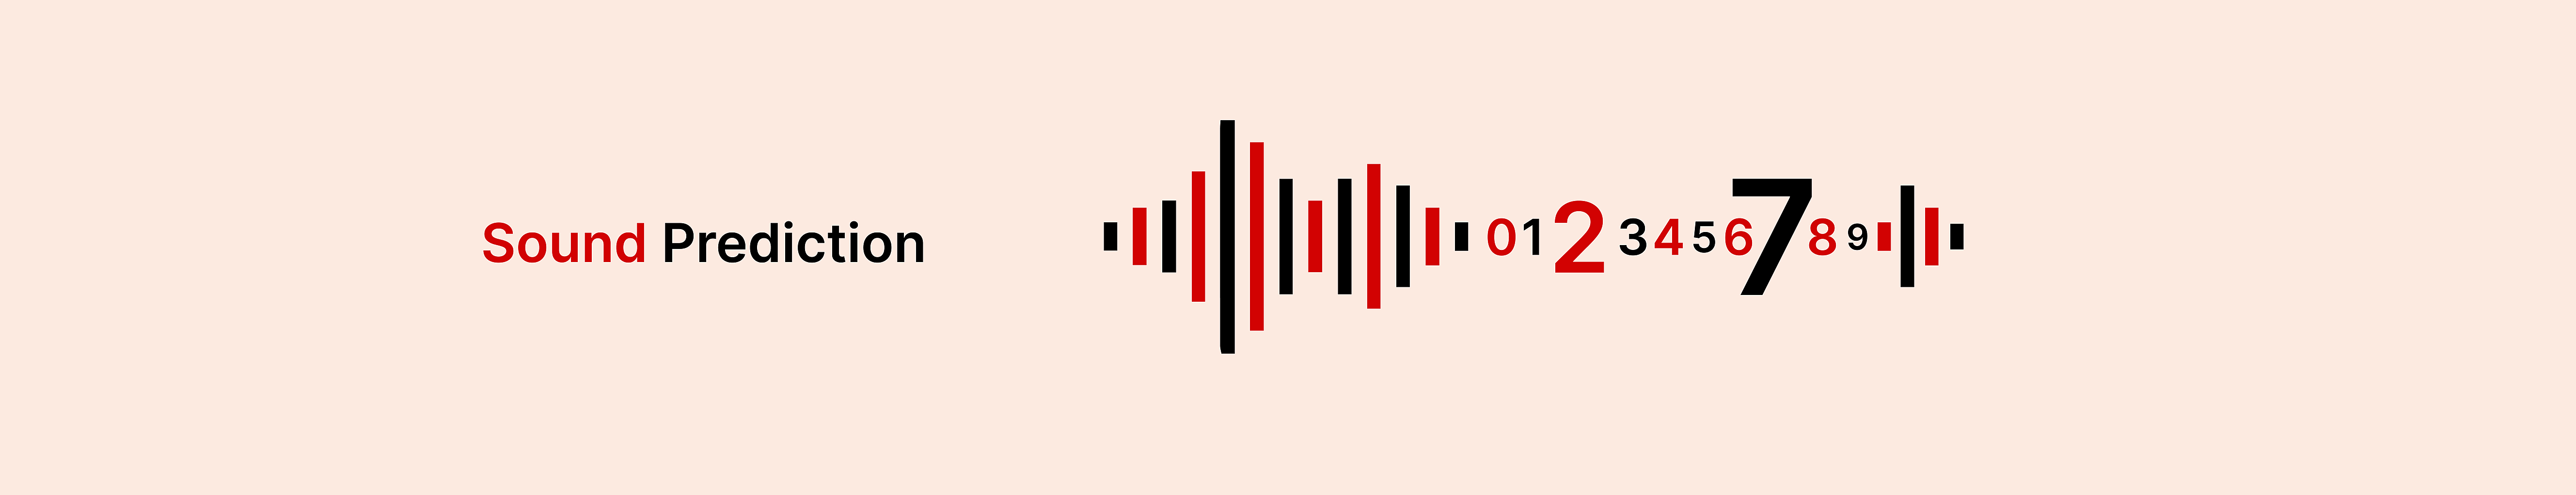

<h2><center>Starter Code for Speech Recognition</center></h2>

<!-- <h6><center>Author : Shubhamai</center></h6> -->



<!-- --- -->

Here we go, this is the last challange of [Blitz 9](https://www.aicrowd.com/challenges/ai-blitz-9/problems/soundprediction).Now in this challange, we are not going to use any text based dataset, but we are going to predict numbers said from a sound. While, we will be learning tons to new things in this final challange, this final challange is more about putting what we learned from the last 4 challanges into practical real-world application such a Speech Recognition.  

### What we are going to Learn

  - Introduction to sound based datasets. 
  - Using [Mozilla DeepSpeech](https://github.com/mozilla/DeepSpeech) to train, evaluate and test our model. 

# Install packages 🗃

In [ ]:
!pip install aicrowd-cli
!mkdir assets

     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 174kB 41.6MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
     |████████████████████████████████| 215kB 47.9MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


## Installing DeepSpeech

Now, all what we are doing in the below 4 cells is to setting up environment for Deepspeech, is a really trick part to do in this whole notebook  

In [ ]:
!git clone --branch v0.9.3 https://github.com/mozilla/DeepSpeech

Cloning into 'DeepSpeech'...
remote: Enumerating objects: 23874, done.
remote: Counting objects: 100% (411/411), done.
remote: Compressing objects: 100% (187/187), done.
remote: Total 23874 (delta 231), reused 357 (delta 211), pack-reused 23463
Receiving objects: 100% (23874/23874), 49.48 MiB | 28.28 MiB/s, done.
Resolving deltas: 100% (16362/16362), done.
Note: checking out 'f2e9c85880dff94115ab510cde9ca4af7ee51c19'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



### Install DeepSpeech Dependencies

All the steps taken for this section are from [Train IITM](https://colab.research.google.com/drive/15s7ZcV-MxOOMIvQSL48KYTSFcDmjc4gi?usp=sharing#scrollTo=rAY5c6vyMHhd)

In [ ]:
%cd /content/
!sudo apt-get install python3-venv
!sudo apt-get install python3-dev
!pip install --upgrade pip
!sudo apt-get install sox
!sudo apt-get install sox libsox-fmt-mp3
!sudo apt install git
!pip install librosa==0.7.2
!sudo apt-get install pciutils
!lspci | grep -i nvidia

!wget https://github.com/git-lfs/git-lfs/releases/download/v2.11.0/git-lfs-linux-amd64-v2.11.0.tar.gz
!tar xvf /content/git-lfs-linux-amd64-v2.11.0.tar.gz -C /content
!sudo bash /content/install.sh
%cd /content/DeepSpeech
!git-lfs pull

!wget https://github.com/mozilla/DeepSpeech/releases/download/v0.7.4/ds_ctcdecoder-0.7.4-cp36-cp36m-manylinux1_x86_64.whl
!pip install /content/DeepSpeech/ds_ctcdecoder-0.7.4-cp36-cp36m-manylinux1_x86_64.whl

!pip3 install folium==0.2.1
!pip3 install --upgrade pip==20.0.2 wheel==0.34.2 setuptools==46.1.3
!pip3 install --upgrade --force-reinstall -e .

/content
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pip-whl python3.6-venv
The following NEW packages will be installed:
  python-pip-whl python3-venv python3.6-venv
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,660 kB of archives.
After this operation, 1,902 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python-pip-whl all 9.0.1-2.3~ubuntu1.18.04.5 [1,653 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3.6-venv amd64 3.6.9-1~18.04ubuntu1.4 [6,188 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3-venv amd64 3.6.7-1~18.04 [1,208 B]
Fetched 1,660 kB in 1s (2,144 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/s

Obtaining file:///content/DeepSpeech
     |████████████████████████████████| 15.3 MB 170 kB/s 
     |████████████████████████████████| 49 kB 7.3 MB/s 
     |████████████████████████████████| 132 kB 57.2 MB/s 
     |████████████████████████████████| 301 kB 59.5 MB/s 
     |████████████████████████████████| 9.9 MB 53.9 MB/s 
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
     |████████████████████████████████| 3.7 MB 71.4 MB/s 
     |████████████████████████████████| 20.2 MB 1.2 MB/s 
     |████████████████████████████████| 203 kB 66.0 MB/s 
     |████████████████████████████████| 2.1 MB 56.4 MB/s 
     |████████████████████████████████| 110.5 MB 15 kB/s 
  Using cached tqdm-4.61.1-py2.py3-none-any.whl (75 kB)
     |████████████████████████████████| 1.5 MB 54.8 MB/s 
     |████████████████████████████████| 80 kB 10.1 MB/s 
     |████████████████████████████████| 164 kB 72.0 MB/s 
     |████████████████████████████████| 40 kB 7.3 MB/s 
     |████████████████████████████████| 

In [ ]:
# Restarting the Runtine, run only below cells after colab has restarted
import os
os.kill(os.getpid(), 9)

**The colab notebook will be restarted by running the cell. Continue by running the below cells after the colab has restarted**

In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
Sat Jun 19 16:36:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |         

### Set default CUDA version

* A input will be asking a confirmation for changing CUDA, Press **Y**

In [ ]:
# Default CUDA version in Colab is 10.1, need to change to 10.0

! echo $PATH

import os
os.environ['PATH'] += ":/usr/local/cuda-10.0/bin"
os.environ['CUDADIR'] = "/usr/local/cuda-10.0"
os.environ['LD_LIBRARY_PATH'] = "/usr/lib64-nvidia:/usr/local/cuda-10.0/lib64"

!echo $PATH
!echo $LD_LIBRARY_PATH
!source ~/.bashrc

!env | grep -i cuda

%cd /content/
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-get install freeglut3 freeglut3-dev libxi-dev libxmu-dev
!sudo apt-get install build-essential dkms
!sudo dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub

!sudo apt-get update
!sudo apt-get install cuda-10-0

!sudo rm /usr/local/cuda
!sudo ln -s /usr/local/cuda-10.0 /usr/local/cuda
%ls -l /usr/local/

!pip3 uninstall tensorflow -y
!pip3 install 'tensorflow-gpu==1.15.2' 

/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin
/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin:/usr/local/cuda-10.0/bin
/usr/lib64-nvidia:/usr/local/cuda-10.0/lib64
LD_LIBRARY_PATH=/usr/lib64-nvidia:/usr/local/cuda-10.0/lib64
CUDADIR=/usr/local/cuda-10.0
LIBRARY_PATH=/usr/local/cuda/lib64/stubs
CUDA_VERSION=11.0.3
NVIDIA_REQUIRE_CUDA=cuda>=11.0 brand=tesla,driver>=418,driver<419 brand=tesla,driver>=440,driver<441 brand=tesla,driver>=450,driver<451
PATH=/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin:/usr/local/cuda-10.0/bin
/content
--2021-06-19 16:36:20--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd6

# Importing Libraries 💻

In [ ]:
# Importing Libraries
import pandas as pd
import re
from ast import literal_eval
import os
import librosa


# To make things more beautiful! 
from rich.console import Console
from rich.table import Table
from rich import pretty
pretty.install()
from IPython.display import Audio

DATA_FOLDER = "data"

# Training phase ⚙️

## Downloading Dataset

Same as previous challenges, we need to download the dataset using AIcrowd CLI 

In [ ]:
API_KEY = '6e1bbe51193ab0f2fd043a5060ca768c' # Please get your your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
# Downloading the Dataset
!rm -rf data
!mkdir data

!aicrowd dataset download --challenge sound-prediction -j 3 -o data

test.zip:   0% 0.00/160M [00:00<?, ?B/s]
train.csv:   0% 0.00/713k [00:00<?, ?B/s]

test.csv:   0% 0.00/159k [00:00<?, ?B/s]
train.csv: 100% 713k/713k [00:00<00:00, 2.05MB/s]


test.csv: 100% 159k/159k [00:00<00:00, 782kB/s]

val.csv:   0% 0.00/69.1k [00:00<?, ?B/s]
val.csv: 100% 69.1k/69.1k [00:00<00:00, 595kB/s]

train.zip:   0% 0.00/643M [00:00<?, ?B/s]

test.zip:  42% 67.1M/160M [00:04<00:05, 16.6MB/s]
train.zip:   5% 33.6M/643M [00:02<00:52, 11.6MB/s]

test.zip:  63% 101M/160M [00:05<00:03, 17.4MB/s] 
test.zip:  84% 134M/160M [00:07<00:01, 17.2MB/s]

val.zip: 100% 63.9M/63.9M [00:06<00:00, 9.97MB/s]
test.zip: 100% 160M/160M [00:09<00:00, 17.4MB/s]

train.zip:  16% 101M/643M [00:08<00:47, 11.4MB/s] 
train.zip:  21% 134M/643M [00:11<00:44, 11.4MB/s]
train.zip:  26% 168M/643M [00:14<00:40, 11.7MB/s]
train.zip:  31% 201M/643M [00:16<00:36, 12.1MB/s]
train.zip:  37% 235M/643M [00:20<00:35, 11.5MB/s]
train.zip:  42% 268M/643M [00:23<00:32, 11.7MB/s]
train.zip:  47% 302M/643M [00:25<00:2

### Unzipping Files

In [ ]:
# Unzipping the zip files into the respective set folders
!unzip /content/data/train.zip  -d /content/data/train >/dev/null
!unzip /content/data/val.zip -d /content/data/val >/dev/null
!unzip /content/data/test.zip -d /content/data/test >/dev/null

## Reading the Dataset

In [ ]:
train_df = pd.read_csv(os.path.join(DATA_FOLDER, "train.csv"))
val_df = pd.read_csv(os.path.join(DATA_FOLDER, "val.csv"))
test_df = pd.read_csv(os.path.join(DATA_FOLDER, "test.csv"))

train_df

SoundID 
 label 
 
 
 
 
 0 
 0 
 efficient spatialtemporal context modeling for 
 
 
 1 
 1 
 on the space 
 
 
 2 
 2 
 baryogenesis through mixing 
 
 
 3 
 3 
 noncommutative gravity in three dimensions 
 
 
 4 
 4 
 effective thermal diffusivity in 
 
 
 ... 
 ... 
 ... 
 
 
 19995 
 19995 
 dixmier trace for 
 
 
 19996 
 19996 
 removahedral congruences versus permutree cong... 
 
 
 19997 
 19997 
 viscous control of minimum 
 
 
 19998 
 19998 
 new boundary harnack inequalities with 
 
 
 19999 
 19999 
 a dynamic systems 
 
 
 
 20000 rows × 2 columns

## Preprocessing the Dataset

In this section, we are going to add some necessary columns whcich `DeepSpeech` will need while model training

In [ ]:
# Preprocessing Dataset Function
def preprocess_data(df, set_name):

  # Adding the Wav filepath 
  df['wav_filename'] = df['SoundID'].apply(lambda x : os.path.join("/content", "data", set_name+"/" +str(x) + ".wav"))
  
  df['transcript'] = df['label']
  
  # Addding the wav file size ( in bytes ), due to mos of the files are around 30,000 bytes, there is not much need put that 
  # But you can do it you want :)
  df['wav_filesize'] = 30000

  return df

In [ ]:
# Preprocessing all three sets
train_df = preprocess_data(train_df, "train")
val_df = preprocess_data(val_df, "val")
test_df = preprocess_data(test_df, "test")
val_df

SoundID 
 label 
 wav_filename 
 transcript 
 wav_filesize 
 
 
 
 
 0 
 0 
 injectivity in higher order 
 /content/data/val/0.wav 
 injectivity in higher order 
 30000 
 
 
 1 
 1 
 minimal constraints in the parity 
 /content/data/val/1.wav 
 minimal constraints in the parity 
 30000 
 
 
 2 
 2 
 learning to refer 
 /content/data/val/2.wav 
 learning to refer 
 30000 
 
 
 3 
 3 
 on the expressive power 
 /content/data/val/3.wav 
 on the expressive power 
 30000 
 
 
 4 
 4 
 small parts in the bernoulli 
 /content/data/val/4.wav 
 small parts in the bernoulli 
 30000 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1995 
 1995 
 responses of small quantum systems 
 /content/data/val/1995.wav 
 responses of small quantum systems 
 30000 
 
 
 1996 
 1996 
 thermal rectification in quantum 
 /content/data/val/1996.wav 
 thermal rectification in quantum 
 30000 
 
 
 1997 
 1997 
 decomposition and unitarity in quantum 
 /content/data/val/1997.wav 
 decomposition and unitarity in quantum 
 30000 
 
 
 1998 
 1998 
 on gravitational collapse in 
 /content/data/val/1998.wav 
 on gravitational collapse in 
 30000 
 
 
 1999 
 1999 
 cogrowth and spectral gap 
 /content/data/val/1999.wav 
 cogrowth and spectral gap 
 30000 
 
 
 
 2000 rows × 5 columns

## Sound 

Listening to some sounds with with respctive labels 

In [ ]:
# Getting a sample from the dataset
example = train_df.iloc[10, :]

# Reading the sound using the path
sound, sample_rate = librosa.load(example['wav_filename'])

("Sound : ", sound), ("Label : ", sample_rate)

(
    ('Sound : ', array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)),
    ('Label : ', 22050)
)

The `sound` is a 1D list with each value is the amplitude of the sound. And the `sample_rate` is show many of the `sound` array elements are going through the speaker in each second. 

**Note : Lower Your PC Volume :)**

In [ ]:
Audio(example['wav_filename'])

<source src="data:audio/x-wav;base64,UklGRjSuAABXQVZFZm10IBAAAAABAAEAQB8AAIA+AAACABAATElTVBoAAABJTkZPSVNGVA4AAABMYXZmNTguNzYuMTAwAGRhdGHurQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA//8AAAEAAAACAP////8CAAAAAAAAAP//AQABAAAAAQADAAEAAAABAAAAAQAAAAAAAAAAAAAA/////wAAAAD+//7///8AAAAAAAD+/wAAAgAAAAAAAAAAAAAA///+/wEAAAAAAAEAAAACAAAAAAAAAAEAAQABAAAAAQAAAAEAAQAAAAAAAAD//wEAAQD//wEAAQAAAAAAAQAAAAAA//8AAAMAAQD+/wAAAQAAAAAAAAD//wAA//8AAAAAAAAAAAAAAQD//wAA/////wAA////////AAABAAAA/////wEAAAAAAAAAAAAAAAIAAAAAAP//AAAAAAAAAQAAAAEAAAABAAAA//8AAAAAAAAAAAAAAAAAAAAAAAD//wAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAA//8AAAAAAAAAAAAAAQAAAP//AAD//wAAAAABAAAAAAABAAEAAAABAAAAAAAAAAAA//8BAAMA//8AAAAAAAAAAAEA//8AAAEAAAABAP////8AAAAAAAAAAAAAAAD//wAA//8AAAAAAAAAAAAAAQAAAAAAAAABAAAAAAAAAP//AAAEAAEAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAEAAQAAAAAAAAAAAAAAAQAAAP//AQAAAAAAAAACAAEA//8AAAIAAQABAAQAAQAAAAQAAAAAAAIAAQABAAEAAgACAAAAAAAAAAAAAAAAAAEAAAAAAAEAAAAAAP7/AQACAAAA//8AAAEAAAABAP////8BAP//AQAAAAAA/v8AAAAAAAABAP3///8CAAAAAAD/////AAD/////AAAAAP////8AAAEAAAD//wAAAQACAAAAAAAAAAAAAAAAAAAAAAABAAAA//8AAAAA/v8AAAAA///9//7/AAAAAP////8AAAAA/v///wAAAAD+/////////wAA//8AAAAA/v///wAA/v///wAA//8AAAAAAAABAAEA/v///wAA//8AAP///v///wAAAAAAAAAAAQABAAAA//8BAAAAAAAAAAAAAAADAAEAAAAAAAEAAAABAAIAAAABAAAAAQAAAP//AQAAAAAAAAAAAAEAAwABAAEAAAABAAAAAQABAAEAAQABAAIAAAAAAAEAAQAAAAAAAAAAAAAAAAAAAP//AAAAAAAAAAABAAEAAAABAAEA//8AAP//AAAAAAEA//8BAAEAAAABAAIABAAAAAEAAQABAAEAAgAEAAUABAAEAAIAAAAAAAAAAwAGAAEAAAABAAIAAQAAAAMABwAIAAQAAgACAAIAAQAAAP7/AAAKAAcAAQAAAP7/AAD+//3/+v/+/wIAAAD9//b/8//8/wEA//8AAP//AQD+//r/+f8BAAYACgAIAAEABQD//wAACAASABMAAwAAAAEAAwADAAsAFAAVABEACwD9//P/+P/+/xEAFwAFAPX/+/8DAAMABAABAAwADgD///n/GQAzADsADQDo//L/CgAPABEAIQAxACkAFwDz/8j/0f/3/ykATgAeAM7/vP8GACMAGwD6/wQAKQAdAN//zP/v/wIA/P/+/xIAGQDy/+r/6P+9/8T/MABiABIA6P8hADgAy//B//n/HADv/63/yP8vAFgAGADy/x4AVgBRAFAAKADa/6L/3v8uAAUAz/8DADgALgDH/1T/m/9nAFUApP+J/4kAJQEmAF7/I/+z/08AYQCr/0P/BQBlAMr/Vv9NAEcBtwBD/yb+vv67ALABuACr/rX9KP89AYgBPwBD/+P/igAIAMf+pP4KAJ4A5P+M/1L/p/8kAf0A2P6//ar/WgJ7Arb/xf10/w8BowHyAJMA2P/u/lP/gADhAGkAcQDsALwAIQCM///+QP7B/u4AMwJhAFn+1v/RAsoCyAAwAN//1f4e/vX/+QCE/wL/egAXAbQBFwGC/3P8vP1hBMEFNP4C+Rj+TwW6BGr+J/rE/WED5AIQ/kn8f/4bAhcDzgCy/+IAygEcAC7+xv5SAUwDDQAK/L39XgL4AuUAigFpATH+Cf9lBCUFfgKP/zH9aP2c/hz/K/+cAEcBvwCy/lcCwQaPBb0C2/+v/Uf9Yv1g/bn+IAF5AbUA/P2n/8QD0gMxAIX7dPxeBHsH1AIk/Yj/mwO/AlT/kP3f/vcAmACc/Xb8iv66/y/+j/4ZAHkBUf8I/o0BtgQHAgf6uPXB/UQJKAhT/VX2HP6FB0sF+fp9+LIBrQf1ACb4ZvxjBFcEvf0G/RYC/wRSAFr5Pvl9AisKjwbL++j28fuBA4sEj/2g+Av9MwNdBOUB3f1X/Ez+iwEFA3ICBQBj/hQALgCXAUwCkgNmAc/9Gf2t/xQCCwIuATEBIgKSAocBzf4s/Ij/XQJYAqH+Dv6yAd4DYwIx/kz94//uAQACJv6e+k78OgOxB10DB/2j/MYD/AdBBT7+JPoC+7UBFQUQADL4yPZ7/cMFrQVl/XD6G/7uBnEJbQRO/hn9SwAeAoEB7f7j/Hr98gGGBL4DoQC6/cD9TQABAcIAj/8f/Yz8F/8nAnAAVgAvAT8CGQKTAZIC5QFnAMP/EgFRAFX+lvtP+vv8SQOmBT4DQwCXAPz/RP+LAO4B1wCj/iz9Fvxu/v8BawOmAgUBPAALAKMAkQBIABcByP9M/r/+5/+gAMH/2/48/7QAEwLcAo4D4AMKAxoChv9m+x36dfwaAVcGYAQe/fr3Dv7nBK8IjwMD/Rr8OACxArQAIf3i+ZL73QD9BdwF4P/Y/fz8iv9zAhMBXvqV9nP8YgJFB3gFbgHr/7oC7QSIAoP/wf27/SH/LQJPAhUB4P/d/s/+8v/w/6QAwADC/h79Sf6/AAYAfwEoAogBSgE/AoYCO/4I/Iv7rP4RAfEBnf8i/v/9SwBFAaYBhQASAFsB1wIKBHoD9AB3/rz9Gf9eAOD/Gv3/+5gBSwXlBLf/7/oF+3H/zwKGAif/ivpu+Nj8GwN8BAoEvAD7APkCqwUnAyz/m/2p/uz/ggEKAlMADgBjACQAp/9K/7n+SwCPAEP/rP3R/kb/0P+2ArgCfwEtAHcAZgAlAvkBlP7q+3T+3f93/2T/0wDHAAwBFwH

In [ ]:
example['transcript']

'cold bosons in optical lattices'

In [ ]:
# Saving the preprocessing dataset
train_df.to_csv("deepspeech_train.csv", index=False)
val_df.to_csv("deepspeech_val.csv", index=False)
test_df.to_csv("deepspeech_test.csv", index=False)

## Training the model + Validation + Testing 

Now, using Deep Speech command line, we are going to put the path of dataset with various other parameters to train & validation every epoch, but test after all epochs are done!

In [ ]:
%cd DeepSpeech  

# We are going to use validation data instead of training because training will take a lot more time
# Putting the data files
# Setting up Model parameters
# Setting up the batch size and audo sample rate
# Using mixed precision so that the model will train faster
# Saving the test predictions

!python DeepSpeech.py --train_files ../deepspeech_train.csv --dev_files ../deepspeech_val.csv --test_files ../deepspeech_test.csv \
 --n_hidden 1048 \
--audio_sample_rate 8000 --train_batch_size 32 --dev_batch_size 32 --test_batch_size 32 \
--automatic_mixed_precision True --epochs 3 \
--test_output_file ../assets/output.txt

%cd ..

/content/DeepSpeech
I0619 16:40:09.254473 140646901794688 utils.py:157] NumExpr defaulting to 2 threads.
I Enabling automatic mixed precision training.
I Could not find best validating checkpoint.
I Could not find most recent checkpoint.
I Initializing all variables.
I STARTING Optimization
Epoch 0 |   Training | Elapsed Time: 0:01:48 | Steps: 625 | Loss: 65.035092     
Epoch 0 | Validation | Elapsed Time: 0:00:05 | Steps: 63 | Loss: 35.207106 | Dataset: ../deepspeech_val.csv
I Saved new best validating model with loss 35.207106 to: /root/.local/share/deepspeech/checkpoints/best_dev-620
--------------------------------------------------------------------------------
Epoch 1 |   Training | Elapsed Time: 0:01:41 | Steps: 625 | Loss: 28.189920     
Epoch 1 | Validation | Elapsed Time: 0:00:05 | Steps: 63 | Loss: 22.660299 | Dataset: ../deepspeech_val.csv
I Saved new best validating model with loss 22.660299 to: /root/.local/share/deepspeech/checkpoints/best_dev-1245
----------------------

# Getting the Predictions

In the previous command, we saved the testing results as `outputs.txt` in assets folder. Let's read the file and convert the outputs into the `.csv` format. 

In [ ]:
# Reading the output.txt file
data = open(os.path.join("assets", "output.txt"))
output = data.read()

# Convert the text into python list
output = literal_eval(output)

In [ ]:
# Getting the sound and respective label for submission
SoundID = [int(sample['wav_filename'].split("/")[-1].split(".")[0])  for sample in output]
label = [sample['res']  for sample in output]
print(SoundID[0], label[0])

3793 froteflack


In [ ]:
test_df['SoundID'] = SoundID
test_df['label'] = label
test_df

SoundID 
 label 
 wav_filename 
 transcript 
 wav_filesize 
 
 
 
 
 0 
 3793 
 froteflack 
 /content/data/test/0.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 1 
 3504 
 lowstelarambliquities 
 /content/data/test/1.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 2 
 1293 
 iminimadari 
 /content/data/test/2.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 3 
 3249 
 arebeon 
 /content/data/test/3.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 4 
 4241 
 optoracar 
 /content/data/test/4.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 4995 
 4116 
 con des model in nolinear le real on 
 /content/data/test/4995.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 4996 
 2254 
 micromagnetic in theviytions if tara arg ier ring 
 /content/data/test/4996.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 4997 
 1684 
 stres les in duced fi active sfor re 
 /content/data/test/4997.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 4998 
 225 
 pesimasm about un non un nons in s pirs 
 /content/data/test/4998.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 4999 
 928 
 ab strace diic nos es for time in cerrent 
 /content/data/test/4999.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 
 5000 rows × 5 columns

In [ ]:
# It is recommended to sort your columns before making the submission
test_df = test_df.sort_values("SoundID")
test_df

SoundID 
 label 
 wav_filename 
 transcript 
 wav_filesize 
 
 
 
 
 692 
 0 
 erranalysis for probabilities 
 /content/data/test/692.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 4213 
 1 
 paely fla competions of universal 
 /content/data/test/4213.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 644 
 2 
 phixed pints of 
 /content/data/test/644.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 2465 
 3 
 geometry of regrangien rahmening 
 /content/data/test/2465.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 1596 
 4 
 creation and danshion of 
 /content/data/test/1596.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 4711 
 4995 
 flame wave s with weak singularities 
 /content/data/test/4711.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 4865 
 4996 
 interactive msc us as a tual 
 /content/data/test/4865.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 2973 
 4997 
 liceipintite in ol tarsmet 
 /content/data/test/2973.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 762 
 4998 
 search for navy 
 /content/data/test/762.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 4786 
 4999 
 es em higx poson serches in 
 /content/data/test/4786.wav 
 abcdefghijklmnopqrstuvwxyz 
 30000 
 
 
 
 5000 rows × 5 columns


**Note : Please make sure that there should be filename `submission.csv` in `assets` folder before submitting it**

In [ ]:
# Saving the sample submission in assets directory
test_df.to_csv(os.path.join("assets", "submission.csv"), index=False)

# Submit to AIcrowd 🚀

**Note : Please save the notebook before submitting it (Ctrl + S)**

In [21]:
!aicrowd notebook submit -c sound-prediction -a assets --no-verify

Mounting Google Drive 💾
Your Google Drive will be mounted to access the colab notebook
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4zxv5y54X5kYZWMwfcyzcKOrtaA06NviKuz0U1kp_9LPKKq0MSc9Q
Mounted at /content/drive
Using notebook: /content/drive/MyDrive/Colab Notebooks/Speech Recognition for submission...
Scrubbing API keys from the notebook...
s

Congratulations 🎉 you did it, but there still a lot of improvement that can be made, Changing Hyperparameters seems the first option to start with, have fun!

And btw -

> Don't be shy to ask question related to any errors you are getting or doubts in any part of this notebook in [discussion forum](https://www.aicrowd.com/challenges/ai-blitz-9/problems/soundprediction) or in [AIcrowd Discord sever](https://discord.gg/T6uZSWBMSZ), AIcrew will be happy to help you :)

Also, wanna give us your valuable feedback for next blitz or wanna work with us creating blitz challanges ? Let us know! 